<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/decision_tree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [114]:
file_path="/content/drive/MyDrive/Iris2.csv"
Data=pd.read_csv(file_path)
print(Data.head())  # display first five Rows
df=Data.copy()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [115]:
df1 =np.array(df)[:,1:5]
df1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [116]:
print(df.dtypes)  # print datatypes of variables

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [117]:
print("Data_shape:{}".format(df.shape))  # Getting Dimension of dataset

Data_shape:(150, 6)


In [118]:

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<ipython-input-119-677b8df715ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(),annot=True)


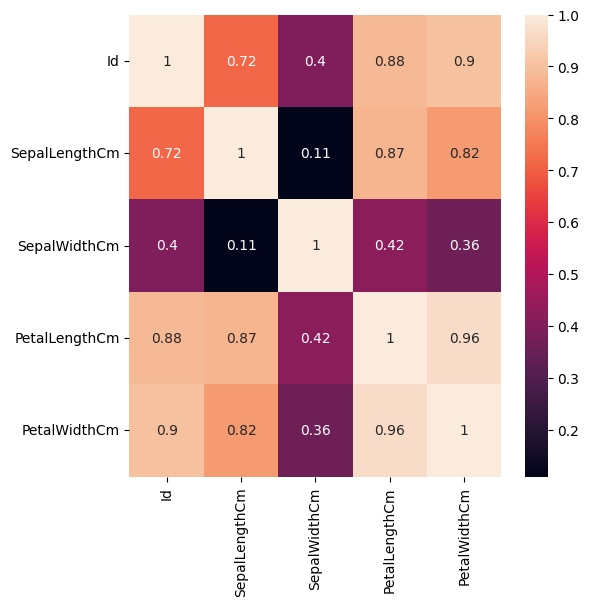

In [119]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

In [120]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [121]:
### Getting numerical features and categorical features
num_features=[col for col in df.columns if df[col].dtypes !='O']
cat_features=[col for col in df.columns if col not in num_features]
print("categorical features:\n{}".format(cat_features),"\n")
print("numerical features:\n{}".format(num_features))

categorical features:
['Species'] 

numerical features:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


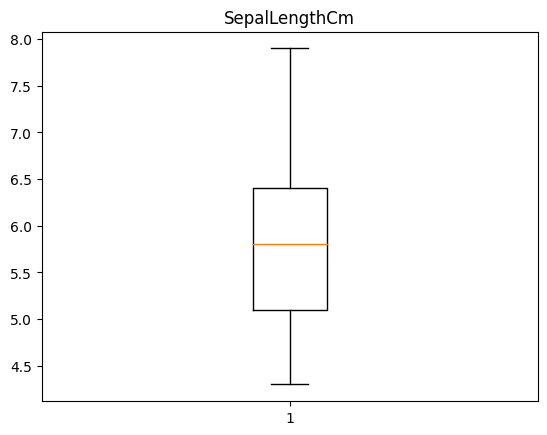

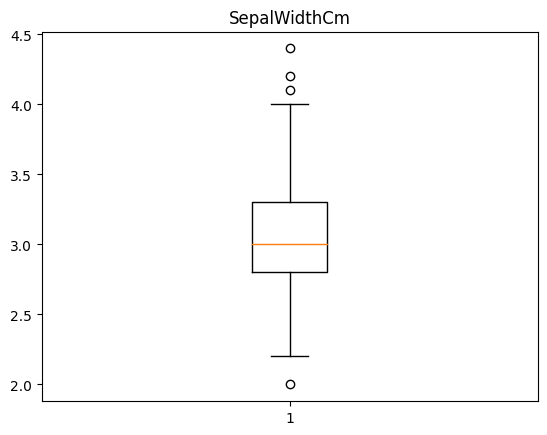

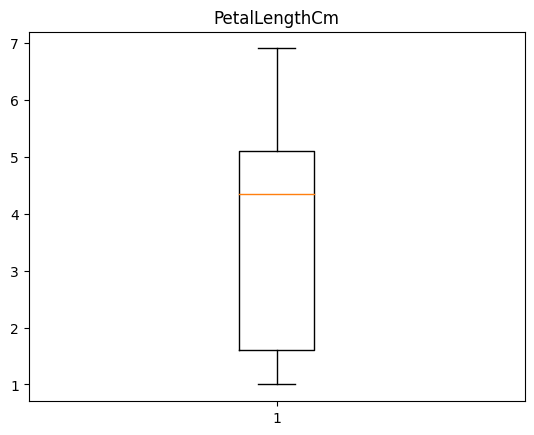

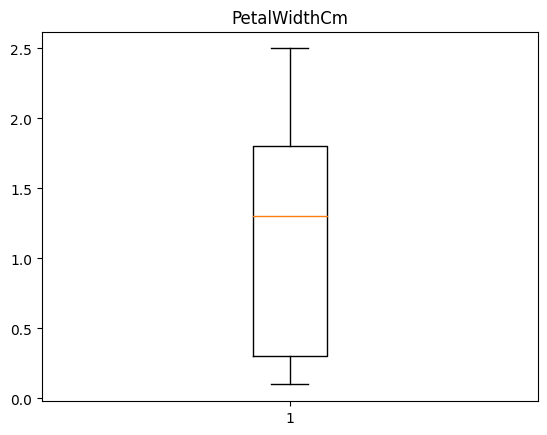

In [122]:
### Histogram for continous features
num_features1=    ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in num_features1:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

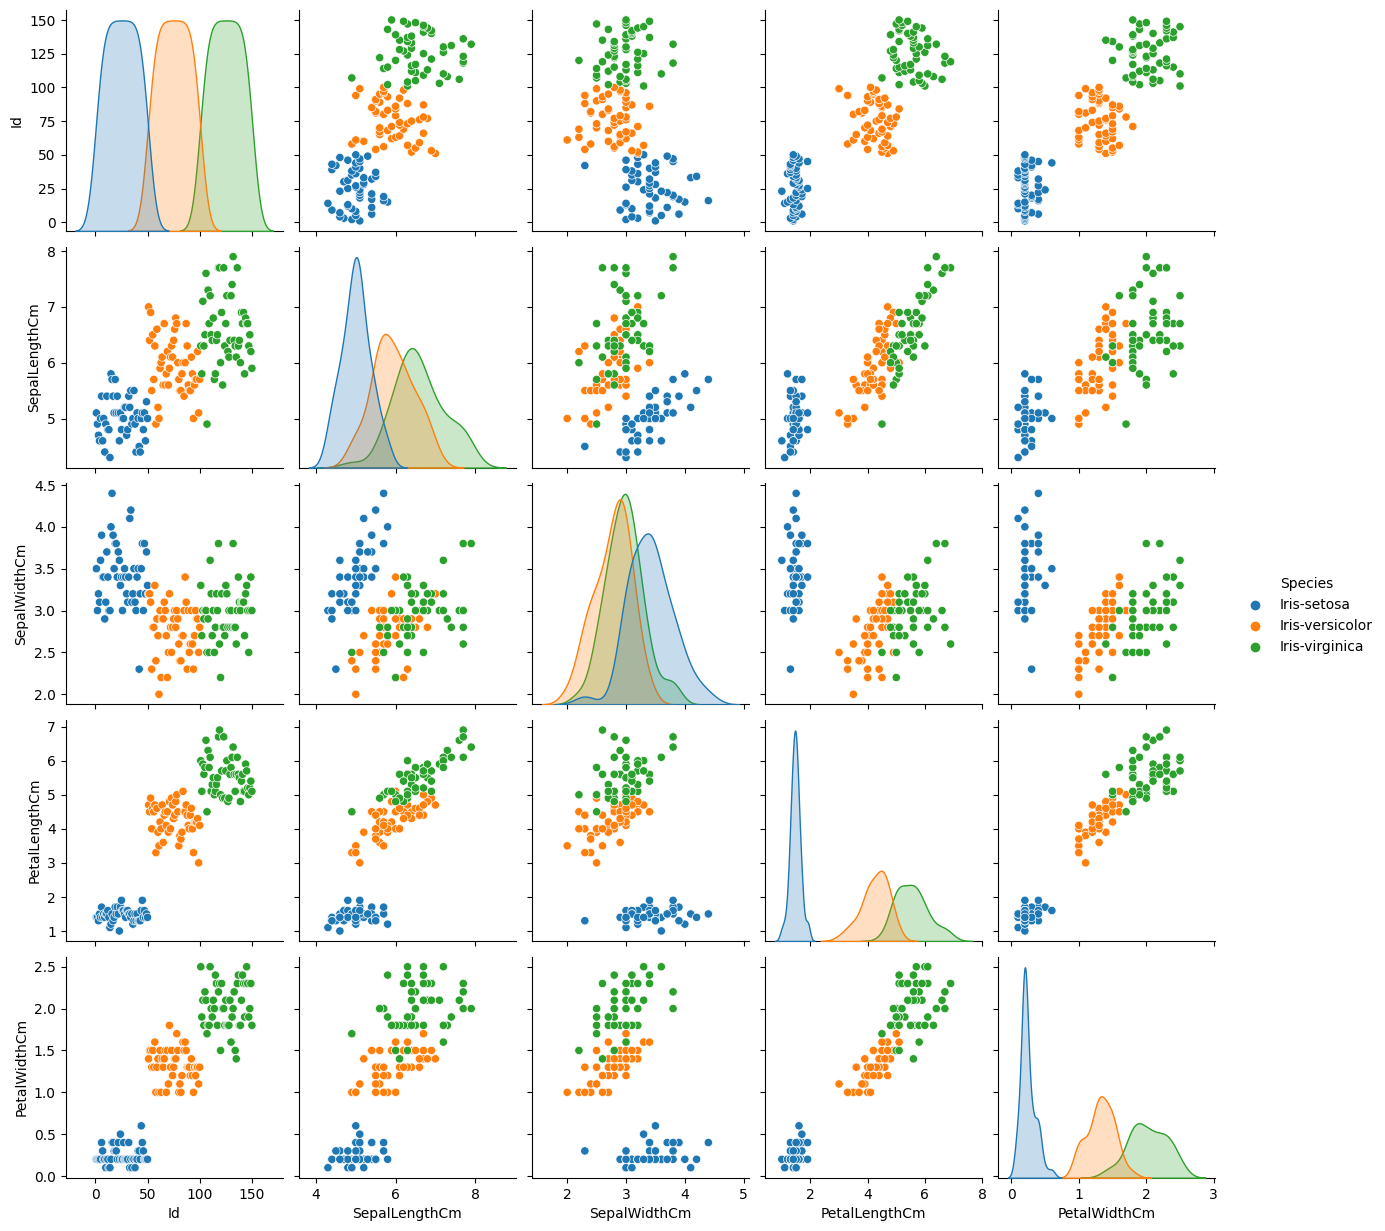

In [123]:
### pairplot
# plt.figure(figsize=(6,6), dpi=80)
sns.pairplot(df, hue="Species")
plt.show()


In [124]:
### note high correlation between petal length and petal width
df=df.drop(['Id','PetalWidthCm'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa


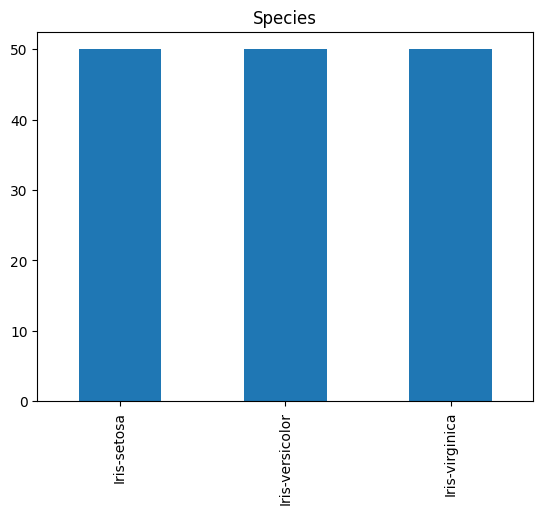

In [125]:
### value counts for target variable
df['Species'].value_counts().plot.bar()
plt.title('Species')
plt.show()

In [126]:
### encoding target variable
label_list=list(Data['Species'].unique())
label_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [127]:
label_dict={i:v for v,i in enumerate(label_list,0)}
label_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [128]:
df['Species']=df['Species'].map(label_dict)

print(df.head())
print(df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  Species
0            5.1           3.5            1.4        0
1            4.9           3.0            1.4        0
2            4.7           3.2            1.3        0
3            4.6           3.1            1.5        0
4            5.0           3.6            1.4        0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  Species
145            6.7           3.0            5.2        2
146            6.3           2.5            5.0        2
147            6.5           3.0            5.2        2
148            6.2           3.4            5.4        2
149            5.9           3.0            5.1        2


In [129]:
df[45:52]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
45,4.8,3.0,1.4,0
46,5.1,3.8,1.6,0
47,4.6,3.2,1.4,0
48,5.3,3.7,1.5,0
49,5.0,3.3,1.4,0
50,7.0,3.2,4.7,1
51,6.4,3.2,4.5,1


jointplot: Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds.

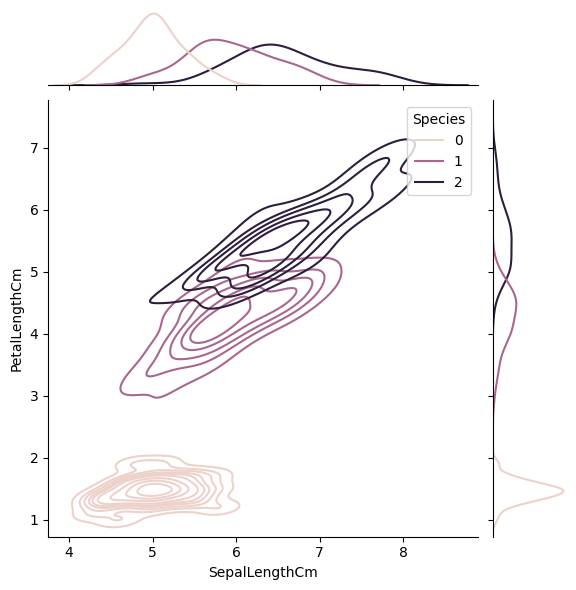

In [130]:
sns.jointplot(x=df['SepalLengthCm'],y=df['PetalLengthCm'],hue=df["Species"],kind='kde')



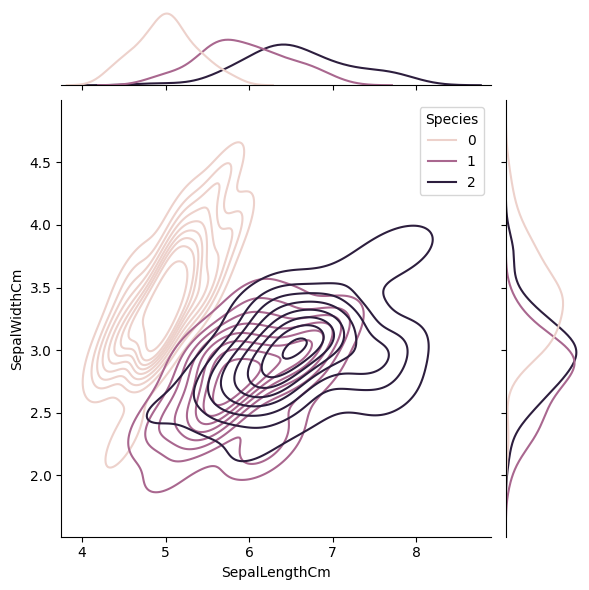

In [131]:
sns.jointplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df["Species"],kind='kde')


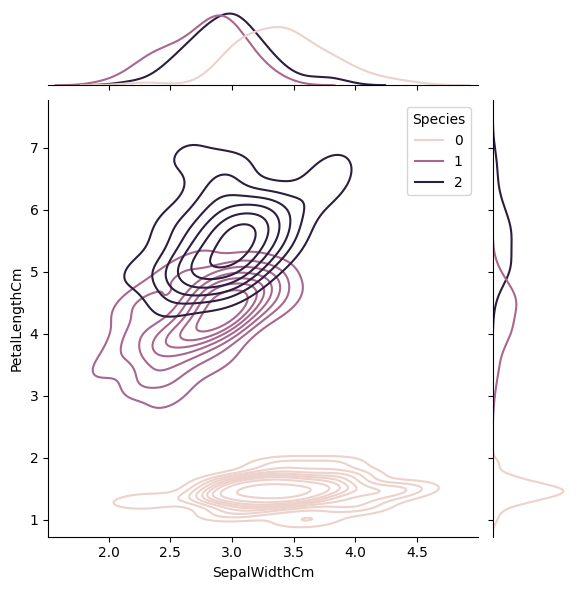

In [132]:
sns.jointplot(x=df['SepalWidthCm'],y=df['PetalLengthCm'],hue=df["Species"],kind='kde')

In [133]:
### features and target variable
X=df.iloc[:,:-1]
print(X)
y=df['Species']
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm
0              5.1           3.5            1.4
1              4.9           3.0            1.4
2              4.7           3.2            1.3
3              4.6           3.1            1.5
4              5.0           3.6            1.4
..             ...           ...            ...
145            6.7           3.0            5.2
146            6.3           2.5            5.0
147            6.5           3.0            5.2
148            6.2           3.4            5.4
149            5.9           3.0            5.1

[150 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64




---



---



In [134]:

### spliting data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [135]:

### learning algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


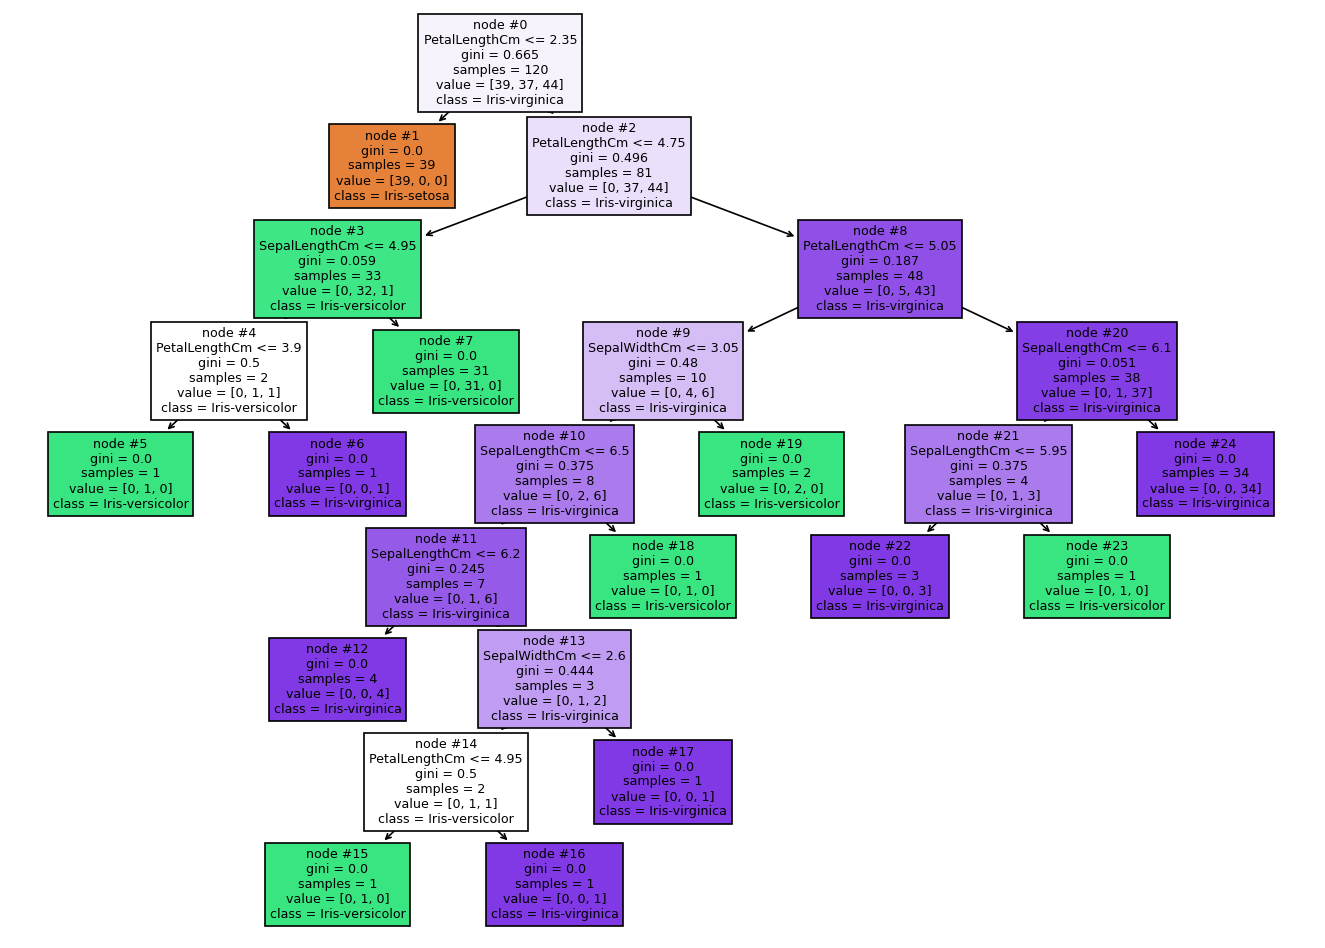

In [148]:
# plot decisio tree classifier
from sklearn import tree
plt.figure(figsize=(14, 10), dpi=120)
tree.plot_tree(clf,node_ids=True,feature_names=X.columns,class_names=label_list,filled=True)
plt.title("Decision Tree")
plt.show()

In [137]:
# "print score of model"
print("score of model:",clf.score(X_test,y_test))

score of model: 0.9666666666666667


In [138]:
### Error metrics
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print('accuracy_score:%0.2f'%score)

accuracy_score:0.97


In [139]:
### classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [140]:
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: Species, dtype: int64


In [141]:
#add y_pred to y_test
y_test1 = y_test.to_frame()
y_test1['y_pred'] = y_pred
print(y_test1)

     Species  y_pred
114        2       2
62         1       1
33         0       0
107        2       2
7          0       0
100        2       2
40         0       0
86         1       1
76         1       1
71         1       1
134        2       1
51         1       1
73         1       1
54         1       1
63         1       1
37         0       0
78         1       1
90         1       1
45         0       0
16         0       0
121        2       2
66         1       1
24         0       0
8          0       0
126        2       2
22         0       0
44         0       0
97         1       1
93         1       1
26         0       0


In [143]:
#print the difference between y_test and y_pred
print(y_test1[y_test1['Species'] != y_test1['y_pred']])


     Species  y_pred
134        2       1


model.feature_importances_ :indicates how much each feature contributes to the model prediction

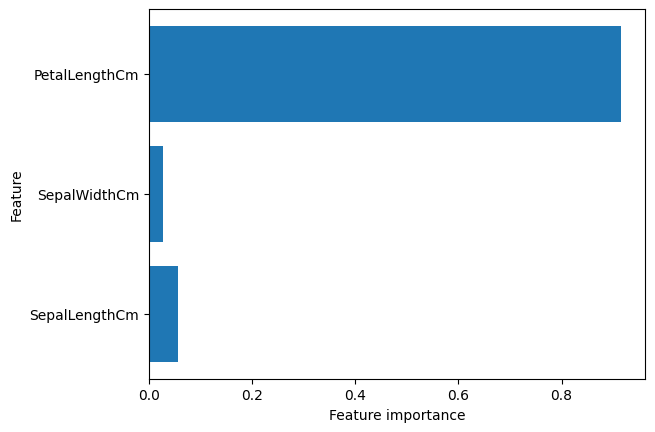

In [147]:
def plot_feature_importance_bar(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importance_bar(clf)